<a href="https://colab.research.google.com/github/casjunior93/Calculo-de-Metricas-de-Avaliacao-de-Aprendizado/blob/main/desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de Métricas de Avaliação de Aprendizado

Neste projeto, vamos calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score.

# Bibliotecas essenciais

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Roteiro

Para criar a matriz de confusão que será usada nesse desafio, vou criar um modelo de classificação para dar suporte a essa matriz. Este modelo de classificação utiliza o conjunto de dados MNIST, composto por 70 mil imagens de algarismos escritos à mão. O objetivo é classificar os algarismos das imagens. Este exemplo de classificação está descrito no livro  Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow, de Aurélien Géron.

Além de gerar a matriz e as métricas, será abordado também a validação cruzada.

# Obtendo os dados

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
%%time
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

CPU times: user 53.9 s, sys: 5.34 s, total: 59.2 s
Wall time: 1min 1s


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Conferindo os dados:

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

# Separando os dados em conjuntos de teste e treino

In [7]:
X_treino, X_teste, y_treino, y_teste = X[:60000], X[60000:], y[:60000], y[60000:]

# Utilizando um classificador multiclasse

O objetivo é criar um sistema que consiga classificar as imagens de algarismos em 10 classes, de 0 a 9.

In [8]:
from sklearn.svm import SVC

In [9]:
svm_clf = SVC()

In [10]:
%%time
svm_clf.fit(X_treino, y_treino)

CPU times: user 5min 35s, sys: 657 ms, total: 5min 36s
Wall time: 5min 35s


SVC()

# Acurácia

In [16]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(svm_clf, X_treino, y_treino, cv=3, scoring='accuracy')

# Matriz de confusão

In [14]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score, plot_roc_curve

CPU times: user 10min 14s, sys: 636 ms, total: 10min 14s
Wall time: 10min 14s


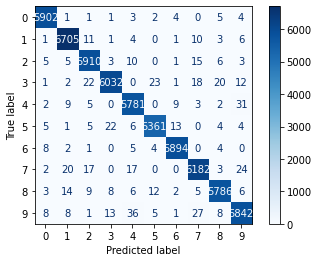

In [15]:
%%time
plot_confusion_matrix(svm_clf, X_treino, y_treino, cmap='Blues');